# Rutu Ketankumar Shah
# Lab 4 : Regression Analysis with Regularization Techniques
# MSCS-634-M40 - Advanced Big Data and Data Mining 

In [1]:
#importing all the essential python library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

Step 1:  Data preparation

In [5]:
#Load diabetes dataset from sckit learn
diabetes = load_diabetes()

#converting this dataset to dataframe
diabetes_df = pd.DataFrame(data=diabetes.data, columns = diabetes.feature_names)
diabetes_df['target'] = diabetes.target

print(diabetes_df.head())

# Printing the shape of the feature matrix and target vector
print("Shape of Sklearn Diabetes Data:", diabetes_df.shape)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
Shape of Sklearn Diabetes Data: (442, 11)


In [6]:
#checking if anymissing values are present
diabetes_missing = diabetes_df.isnull().sum()
print("Print missing values from each column" , diabetes_missing)

Print missing values from each column age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


Step 2: Linear Regression

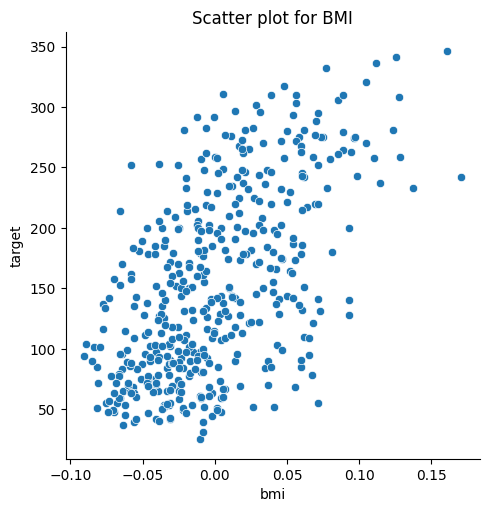

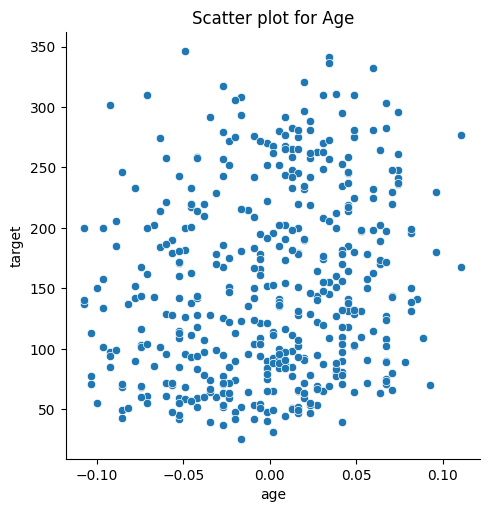

In [14]:
#Implement a Simple Linear Regression model using one feature as the independent variable and the target variable as the dependent variable.
#to implement the independent feature, visualizing the bmi and age of the people from the diabetes dataset available

sns.relplot(x='bmi', y='target', data=diabetes_df)
plt.title("Scatter plot for BMI")
plt.show()

sns.relplot(x='age', y='target', data=diabetes_df)
plt.title("Scatter plot for Age")
plt.show()


In [16]:
#implementing the independent variable
x = np.array(diabetes_df['age']).reshape(-1,1)
y = np.array(diabetes_df['bmi']).reshape(-1,1)

In [17]:
#spliting the data into training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [27]:
#Train the model and evaluate its performance using MAE, MSE, RMSE, and R².

#training the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model = reg.fit(x_train, y_train)
model.coef_, model.intercept_

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#we do prediction using prediction model by passing the test data
y_pred = model.predict(x_test)

#here y_test is the real answer and y_pred is the model predicted answer, which we will be comparing now
mae = mean_absolute_error(y_true = y_test,y_pred = y_pred)
mse = mean_squared_error(y_true = y_test,y_pred = y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MAE : {} MSE: {} RMSE : {} R^2: {}'.format(mae,mse,rmse, r2))

MAE : 0.03589235861126174 MSE: 0.0019984698799405177 RMSE : 0.0447042490143892 R^2: -0.006237383864042156


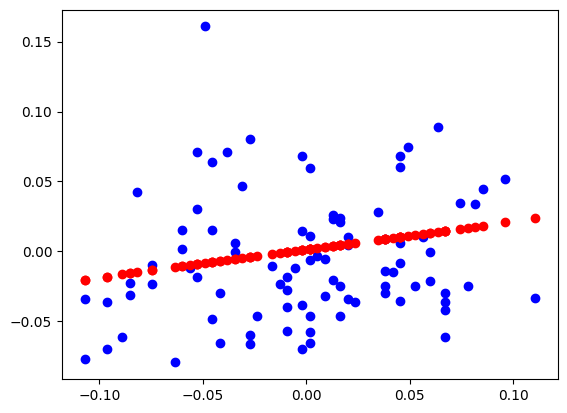

In [21]:
#Visualization of the model's predictions against the actual data.
plt.scatter(x_test, y_test, color = 'blue')
plt.scatter(x_test, y_pred, color = 'red')
plt.show()

Step 3: Multiple Regression

In [46]:
#implementing the multiple regression using multiple independent variables.
X = np.array(diabetes_df[['age', 'bmi','bp']]).reshape(-1,3)
y = np.array(diabetes_df['target'])

In [47]:
#split and train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [48]:
#train model
reg = LinearRegression()
model = reg.fit(X_train, y_train)
model.coef_, model.intercept_

(array([ 29.74072904, 775.09568806, 396.29404065]),
 np.float64(153.6666424177078))

In [51]:
#evaluation of multiple regression models
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: {} MSE: {} RMSE: {} Rˆ2 {}'.format(mae, mse, rmse, r2))

MAE: 41.728606914311456 MSE: 2656.0248029134586 RMSE: 2656.0248029134586 Rˆ2 0.5168592100147791


Text(0, 0.5, 'y-actual')

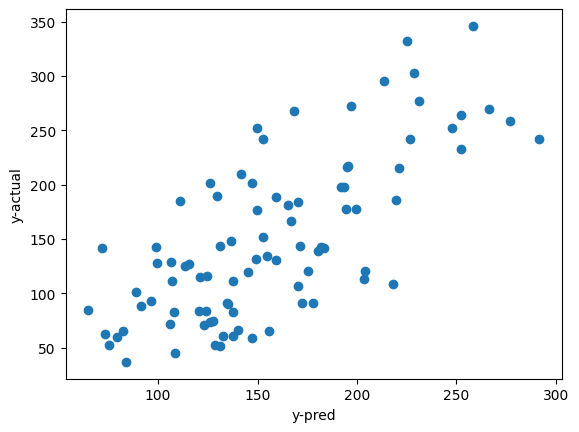

In [52]:
#data visualization
plt.scatter(y_pred, y_test)
plt.xlabel('y-pred')
plt.ylabel('y-actual')

Step 4: Polynomial Regression

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [31]:
#implementation of polynomial regression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [33]:
poly = PolynomialFeatures(degree=2)
poly_train = poly.fit_transform(x_train.reshape(-1,1))
poly_test = poly.fit_transform(x_test.reshape(-1,1))
poly_train

array([[ 1.00000000e+00,  7.07687525e-02,  5.00821633e-03],
       [ 1.00000000e+00, -8.17978625e-02,  6.69089030e-03],
       [ 1.00000000e+00, -2.36772472e-02,  5.60612037e-04],
       ...,
       [ 1.00000000e+00,  1.26481373e-02,  1.59975377e-04],
       [ 1.00000000e+00,  1.26481373e-02,  1.59975377e-04],
       [ 1.00000000e+00,  2.35457526e-02,  5.54402467e-04]])

In [34]:
#training the linear regression with polynomial features
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_train, y_train)

LinearRegression()

In [36]:
#evaluating the poly reg model
y_pred =  poly_reg_model.predict(poly_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: {} MSE: {} RMSE: {} Rˆ2 {}'.format(mae, mse, rmse, r2))

MAE: 0.038727822697208564 MSE: 0.0024943655861867273 RMSE: 0.0024943655861867273 Rˆ2 0.011621981652685132


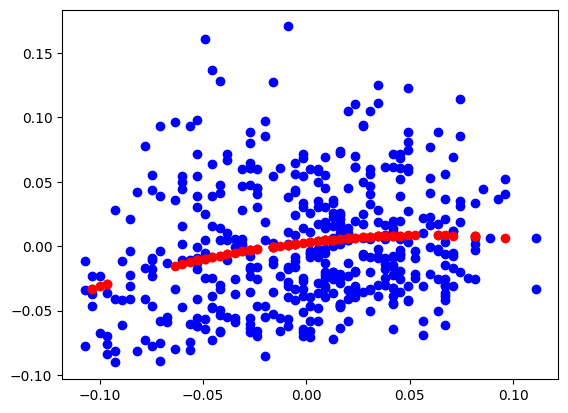

In [39]:
#visualization of the poly regression model
plt.scatter(x, y, color = 'blue')
plt.scatter(x_test, y_pred, color = 'red')
plt.show()


In [ ]:
#demonstration on how increasing the polynomial degree can affect overfitting and underfitting.
poly = PolynomialFeatures(degree=51)
poly_train = poly.fit_transform(x_train.reshape(-1, 1))
poly_test = poly.fit_transform(x_test.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_train, y_train)
y_pred = poly_reg_model.predict(poly_train)
mae = mean_absolute_error(y_true=y_train,y_pred=y_pred)
mse = mean_squared_error(y_true=y_train,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_train,y_pred=y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print('''Training:MAE: {}MSE: {}RMSE: {} Rˆ2 {}'''.format(mae, mse, rmse, r2))

y_pred = poly_reg_model.predict(poly_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('''Testing:MAE: {}MSE: {}RMSE: {}Rˆ2 {}'''.format(mae, mse, rmse, r2))

Training:
          MAE: 0.03682591155387974
          MSE: 0.0020510441600221823
          RMSE: 0.0020510441600221823
          Rˆ2 0.06563282134962334
Testing:
          MAE: 0.038148489798329334
          MSE: 0.0024564660509529108
          RMSE: 0.0024564660509529108
          Rˆ2 0.026639454527601414


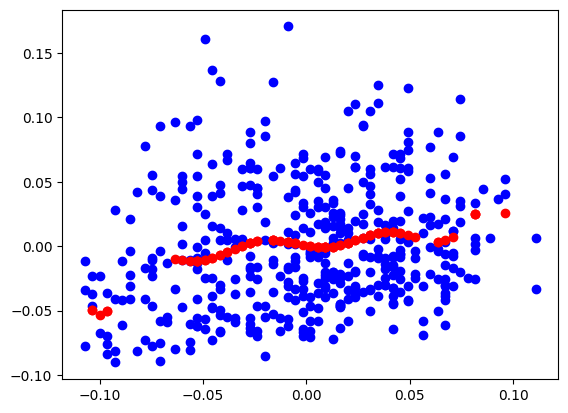

In [42]:
#visualization
plt.scatter(x, y, color = 'blue')
plt.scatter(x_test, y_pred, color = 'red')
plt.show()

Step 5: Regularization with Ridge and Lasso Regression

In [58]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

#adding regularization strengths
alpha_ridge = 0.001
alpha_lasso = 0.001

#creating and training the ridge and lasso regression model
ridge_model = Ridge(alpha=alpha_ridge)
ridge_model.fit(X_train,y_train)

lasso_model = Lasso(alpha=alpha_lasso)
lasso_model.fit(X_train,y_train)

#making predictions
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

#evaluating values for ridge model
ridge_r2_train = r2_score(y_train, y_train_pred_ridge)
ridge_r2_test = r2_score(y_test, y_test_pred_ridge)
ridge_mse_train = mean_squared_error(y_train, y_train_pred_ridge)
ridge_mse_test = mean_squared_error(y_test, y_test_pred_ridge)

#evaluating values for lasso model
lasso_r2_train = r2_score(y_train, y_train_pred_lasso)
lasso_r2_test = r2_score(y_test, y_test_pred_lasso)
lasso_mse_train = mean_squared_error(y_train, y_train_pred_lasso)
lasso_mse_test = mean_squared_error(y_test, y_test_pred_lasso)

print("\nRegularization:")
print(f"Ridge Regression - Training R-squared: {ridge_r2_train:.4f} , Testing R-squared: {ridge_r2_test:.4f}")
print(f"Lasso Regression - Training R-squared: {lasso_r2_train:.4f}, Testing R-squared: {lasso_r2_test:.4f}")


Regularization:
Ridge Regression - Training R-squared: 0.3677 , Testing R-squared: 0.5168
Lasso Regression - Training R-squared: 0.3677, Testing R-squared: 0.5168
